In [1]:
!pip install chainladder

     |████████████████████████████████| 1.3 MB 4.2 MB/s 
     |████████████████████████████████| 77 kB 6.7 MB/s 
     |████████████████████████████████| 22.3 MB 66.4 MB/s 
     |████████████████████████████████| 148 kB 53.2 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import pandas as pd
import numpy as np
import chainladder as cl
import os

print("pandas: " + pd.__version__)
print("numpy: " + np.__version__)
print("chainladder: " + cl.__version__)

pandas: 1.1.5
numpy: 1.19.5
chainladder: 0.8.7


In [3]:
%matplotlib inline

In [4]:
# load the sample data present in chain ladder package.
dev_triangle= cl.load_sample("RAA")
dev_triangle

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [5]:
dev_triangle.head()

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [6]:
# use link_ratio function to get  loss development factor(lDF).

dev_triangle.link_ratio


,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


In [7]:
# latest_diagonal can be viewed and worked upon

latest_paid= dev_triangle.latest_diagonal


In [8]:
# few important functions to keep note of

print("Is triangle cumulative?", dev_triangle.is_cumulative)
print("Does triangle contain ultimate projections?", dev_triangle.is_ultimate)
print("Is this a valuation triangle?", dev_triangle.is_val_tri)
print('Has the triangle been "squared"?', dev_triangle.is_full)

Is triangle cumulative? True
Does triangle contain ultimate projections? False
Is this a valuation triangle? False
Has the triangle been "squared"? False


In [9]:
# we can always change the view of development triangle from incremental to cumulative and vice-versa using "incr_to_cum" and "cum_to_incr" methods.

dev_triangle_inc= dev_triangle.cum_to_incr()
dev_triangle_inc

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","3,257","2,638",898,"1,734","2,642","1,828",599,54,172
1982,106,"4,179","1,111","5,270","3,116","1,817",-103,673,535,
1983,"3,410","5,582","4,881","2,268","2,594","3,479",649,603,,
1984,"5,655","5,900","4,211","5,500","2,159","2,658",984,,,
1985,"1,092","8,473","6,271","6,333","3,786",225,,,,
1986,"1,513","4,932","5,257","1,233","2,917",,,,,
1987,557,"3,463","6,926","1,368",,,,,,
1988,"1,351","5,596","6,165",,,,,,,
1989,"3,133","2,262",,,,,,,,
1990,"2,063",,,,,,,,,


In [10]:
# if a triangle is already in cumulative view and we try to change to cumulative then the output would not change the view of triangle.
dev_triangle_cum= dev_triangle.incr_to_cum()
print(dev_triangle)
dev_triangle_cum


         12       24       36       48       60       72       84       96       108      120
1981  5012.0   8269.0  10907.0  11805.0  13539.0  16181.0  18009.0  18608.0  18662.0  18834.0
1982   106.0   4285.0   5396.0  10666.0  13782.0  15599.0  15496.0  16169.0  16704.0      NaN
1983  3410.0   8992.0  13873.0  16141.0  18735.0  22214.0  22863.0  23466.0      NaN      NaN
1984  5655.0  11555.0  15766.0  21266.0  23425.0  26083.0  27067.0      NaN      NaN      NaN
1985  1092.0   9565.0  15836.0  22169.0  25955.0  26180.0      NaN      NaN      NaN      NaN
1986  1513.0   6445.0  11702.0  12935.0  15852.0      NaN      NaN      NaN      NaN      NaN
1987   557.0   4020.0  10946.0  12314.0      NaN      NaN      NaN      NaN      NaN      NaN
1988  1351.0   6947.0  13112.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1989  3133.0   5395.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN
1990  2063.0      NaN      NaN      NaN      NaN      NaN   

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


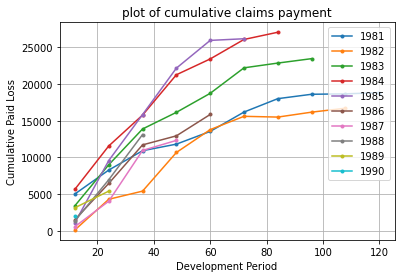

In [11]:
dev_triangle.T.plot(
    marker='.', grid=True,
    title='plot of cumulative claims payment').set(
    xlabel='Development Period', ylabel='Cumulative Paid Loss');

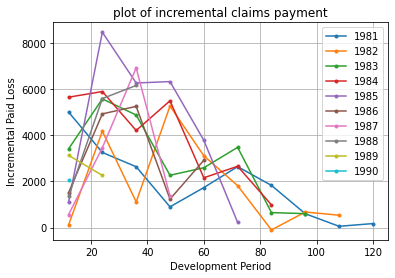

In [12]:
dev_triangle_inc.T.plot(
    marker='.', grid=True,
    title='plot of incremental claims payment').set(
    xlabel='Development Period', ylabel='Incremental Paid Loss');

**Deterministic methods**

**Chain ladder algorithm**



In [13]:
dev_triangle.is_cumulative

True

In [14]:
# fitting the development triangle into the chainladder fit method to estimate the ibnr values or full triangle.
model = cl.Chainladder().fit(dev_triangle)



In [15]:
# predicted IBNR incremental triangle.
only_ibnr = (model.full_triangle_.cum_to_incr() - dev_triangle.cum_to_incr())
only_ibnr

,12,24,36,48,60,72,84,96,108,120,132,9999
1981,,,,,,,,,,,,
1982,,,,,,,,,,154,,
1983,,,,,,,,,397,220,,
1984,,,,,,,,900,474,262,,
1985,,,,,,,"1,098",907,477,264,,
1986,,,,,,"1,797",740,612,322,178,,
1987,,,,,"2,114","1,636",674,557,293,162,,
1988,,,,"3,552","2,861","2,214",912,753,396,219,,
1989,,,"3,364","2,373","1,911","1,479",609,503,265,147,,
1990,,"4,125","3,858","2,721","2,192","1,696",698,577,304,168,,


In [16]:
# Cumulative estimated full triangle
full_tri = model.full_triangle_
full_tri

,12,24,36,48,60,72,84,96,108,120,132,9999
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834","18,834","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704","16,858","16,858","16,858"
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466","23,863","24,083","24,083","24,083"
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067","27,967","28,441","28,703","28,703","28,703"
1985,"1,092","9,565","15,836","22,169","25,955","26,180","27,278","28,185","28,663","28,927","28,927","28,927"
1986,"1,513","6,445","11,702","12,935","15,852","17,649","18,389","19,001","19,323","19,501","19,501","19,501"
1987,557,"4,020","10,946","12,314","14,428","16,064","16,738","17,294","17,587","17,749","17,749","17,749"
1988,"1,351","6,947","13,112","16,664","19,525","21,738","22,650","23,403","23,800","24,019","24,019","24,019"
1989,"3,133","5,395","8,759","11,132","13,043","14,521","15,130","15,634","15,898","16,045","16,045","16,045"
1990,"2,063","6,188","10,046","12,767","14,959","16,655","17,353","17,931","18,234","18,402","18,402","18,402"


In [17]:
# Incremental estimated full triangle
full_tri.cum_to_incr()

,12,24,36,48,60,72,84,96,108,120,132,9999
1981,"5,012","3,257","2,638",898,"1,734","2,642","1,828",599,54,172,,
1982,106,"4,179","1,111","5,270","3,116","1,817",-103,673,535,154,,
1983,"3,410","5,582","4,881","2,268","2,594","3,479",649,603,397,220,,
1984,"5,655","5,900","4,211","5,500","2,159","2,658",984,900,474,262,,
1985,"1,092","8,473","6,271","6,333","3,786",225,"1,098",907,477,264,,
1986,"1,513","4,932","5,257","1,233","2,917","1,797",740,612,322,178,,
1987,557,"3,463","6,926","1,368","2,114","1,636",674,557,293,162,,
1988,"1,351","5,596","6,165","3,552","2,861","2,214",912,753,396,219,,
1989,"3,133","2,262","3,364","2,373","1,911","1,479",609,503,265,147,,
1990,"2,063","4,125","3,858","2,721","2,192","1,696",698,577,304,168,,


In [18]:
# ultimate loss on all the years
ultimate_loss= full_tri.latest_diagonal


In [19]:
# sum total of ultimate loss 

print("sum total of ultimate loss is: ")
ultimate_sum= ultimate_loss.sum()
print(ultimate_sum)


sum total of ultimate loss is: 
213122.22826121017


In [20]:
# sum total of paid loss
print("sum total of latest paid loss is: ")
paid_sum= latest_paid.sum()
print(paid_sum)

sum total of latest paid loss is: 
160987.0


In [21]:
# sum total of IBNR loss.
print("Outstanding or IBNR total loss is: ")
ibnr_sum= ultimate_sum-paid_sum
print(ibnr_sum)

Outstanding or IBNR total loss is: 
52135.22826121017


**Tail Factors**

In [31]:
tail = cl.TailCurve().fit(dev_triangle)
print("Cumulative Delelopment factors:")
print(tail.cdf_)
print("Loss Development Factors:")
print(tail.ldf_)
# Slice just the tail entries
print("Tail estimates of next two years:")
tail.cdf_[~tail.ldf_.development.isin(dev_triangle.link_ratio.development)]

Cumulative Delelopment factors:
         12-Ult    24-Ult    36-Ult    48-Ult    60-Ult    72-Ult    84-Ult    96-Ult   108-Ult   120-Ult   132-Ult
(All)  9.004403  3.002109  1.849133  1.454993  1.241806  1.115343  1.070454  1.035993  1.018739  1.009436  1.005006
Loss Development Factors:
          12-24     24-36     36-48     48-60     60-72     72-84     84-96    96-108   108-120   120-132   132-144
(All)  2.999359  1.623523  1.270888  1.171675  1.113385  1.041935  1.033264  1.016936  1.009217  1.004408  1.005006
Tail estimates of next two years:


,120-Ult,132-Ult
(All),1.0094,1.0050
